In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import uniform, seed
seed(12345)

## MC integrace

Calculate the integral $\int_0^1 x^n \sin(\alpha\pi x){\rm d}x$ for $n=20$, $\alpha=20.5$ using the Monte Carlo method with 1000 uniformly distributed samples.


In [2]:
def f(x, n=20, alpha=20.5): return x**n*np.sin(np.pi*20.5*x)

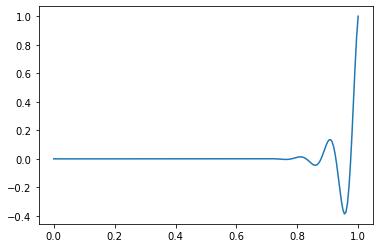

In [3]:
x = np.linspace(0, 1, 200)
plt.plot(x, f(x))

In [4]:
def integrate_MC(f, a, b, nsampl):
    # task 1
    return integral

In [5]:
integrate_MC(f, 0, 1, 1000)

0.0020830159520968134

Repeat the calculation 20 times and calculate the standard deviation of the results.

Then calculate the same integral and standard deviation using 1, 10, 100,.... 100000 random Monte Carlo samples and calculate the corresponding standard deviations.

In [6]:
def test_integrate_MC(f, a, b, nsampl, ntest, integrator=integrate_MC):
    # task 2
    return np.mean(integrals), np.std(integrals)

In [7]:
nsampls = 10**np.arange(6)
ntest = 20

In [8]:
integrals = np.array([test_integrate_MC(f, 0, 1, nsampl, ntest) for nsampl in nsampls])

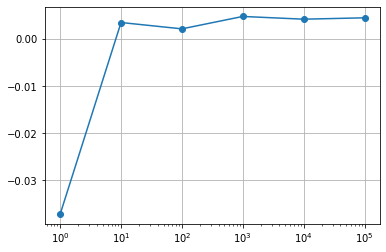

In [9]:
plt.plot(nsampls, integrals[:,0], "-o")
plt.gca().set_xscale("log")
plt.grid()

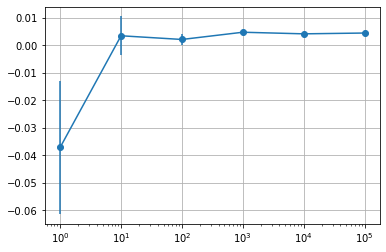

In [10]:
plt.errorbar(nsampls, integrals[:,0], fmt="-o", yerr=integrals[:,1]/np.sqrt(ntest))
plt.gca().set_xscale("log")
plt.grid()

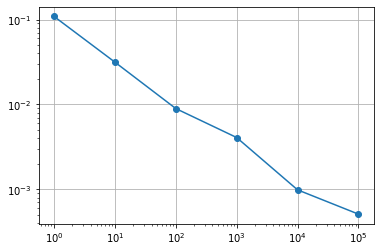

In [11]:
plt.loglog(nsampls, integrals[:,1], "-o")
plt.gca().set_xscale("log")
plt.grid()

### Generování náhodných čísel

Generujte náhodná čísla s rozdělovací funkcí $f = (n+1)x^n$ na intervalu 0, 1 a ověřte funkčnost podle histogramu

pozn: metoda kumulativní distribuční funkce vychází z transformace náhodných proměnných. Mějme $x$ z rozdělení $f(x)dx$:
$$x\sim f(x)dx$$
jaké bude rozdělení proměnné $y = g(x)$? Provedeme substituci jako při záměně proměnných v integrálu, tedy použijeme:
$$x = g^{-1}(y),\quad dx = \frac{dg^{-1}}{dy}dy$$
a dostáváme
$$f(x)dx = f(g^{-1}(y))\frac{dg^{-1}}{dy}dy = f'(y)dy$$
kde transformovaná hustota pravděpodobnosti je $f'(y) = f(g^{-1}(y))\frac{dg^{-1}}{dy}$.

Když chceme generovat $y\sim h(y)dy$ transformací veličiny $x\sim U(0,1)dx$,
$$f(x) = 1 {\ \rm pro\ } x\in \left<0,1\right>, {\ \rm jinak\ } 0$$
a použijeme jako transformační funkci inverzní distribuční funkci, tedy $g = H^{-1}; H(y) = \int_{-\infty}^y h(y')dy'$, tak dostáváme
$$ g^{-1} = H;\quad \frac{dg^{-1}}{dy} = h(y)$$
a
$$f(H(y)) = 1 \forall y$$
tedy 
$$f'(y) = h(y)$$

In [12]:
def gen_dist(x, n=20):
    return x**n*(n+1)

def gen_inverse(nsampl, n=20):
    # DF = x**n*(n+1)
    # CDF = x**(n+1)
    # inv CDF = x**(1/(n+1))
    xsampl = uniform(0, 1, nsampl)
    return xsampl**(1/(n+1))

In [13]:
samples = gen_inverse(10000)

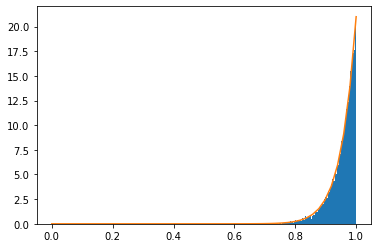

In [14]:
plt.hist(samples, density=True, bins=100);
x = np.linspace(0,1)
plt.plot(x, x**20*21)

In [15]:
def integrate_MC_importance(f, a, b, nsampl):
    xsamples = gen_inverse(nsampl)
    fsamples = f(xsamples)/gen_dist(xsamples)
    integral = np.sum(fsamples)/nsampl*(b-a)
    return integral

In [16]:
integrate_MC_importance(f, 0, 1, 1000)

0.005485727527213514

In [17]:
integrals_importance = np.array([test_integrate_MC(f, 0, 1, nsampl, ntest, integrator=integrate_MC_importance) for nsampl in nsampls])

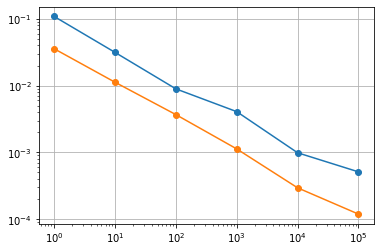

In [18]:
plt.loglog(nsampls, integrals[:,1], "-o")
plt.loglog(nsampls, integrals_importance[:,1], "-o")
plt.gca().set_xscale("log")
plt.grid()

Generujte 3D jednotkový vektor s náhodným směrem (rovnoměrné rozdělení na povrchu jednotkové koule). Můžete použít zamítací metodu a nebo následující identity
$$\cos(\theta) \sim U(-1,1)$$
$$\phi\sim U(0, 2\pi)$$

In [19]:
def random_direction(nsampl, l=1):
    """generate nsampl 3D vectors with random directions and length l"""
    v = np.zeros((nsampl, 3))
    cos_theta = 1 - 2*np.random.uniform(size = nsampl)
    sin_theta = np.sqrt(1-cos_theta**2)
    phi = 2*np.pi*np.random.uniform(size = nsampl)

    v[:,0] = l*cos_theta
    v[:,1] = l*sin_theta*np.sin(phi)
    v[:,2] = l*sin_theta*np.cos(phi)

    return v

In [20]:
    vs = random_direction(1000000)

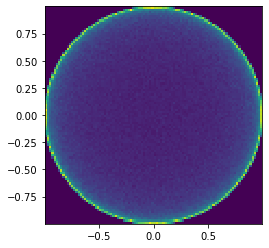

In [21]:
plt.hist2d(vs[:,0], vs[:,1], bins=100)
plt.gca().set_aspect("equal")